* images_0 : 얼굴이 똑바로 정면, 사진상 가운데
* images_1 : 얼굴을 좀 더 크게
* images_2 : 얼굴 오른쪽
* images_3 : 얼굴 왼쪽
* men : 로다주 얼굴
* iron : 아이언맨 얼굴
* BTS : 방탄소년단 7명 얼굴
* baby.mp4 : 건후 영상

## 1. 얼굴 똑바로 정면, 사진 상 가운데

### Step1. 스티커 구하기 or 만들기

In [1]:
# 이미지 처리를 위해 opencv와 이미지를 출력하기 위한 matplotlib 읽어오기
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


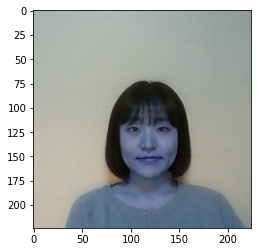

In [2]:
# 준비한 이미지를 읽기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/images_0.png' # images_0 : 정면
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지 불러오기
img_show = img_bgr.copy()      # 출력용 이미지 따로 보관
plt.imshow(img_bgr)
plt.show()

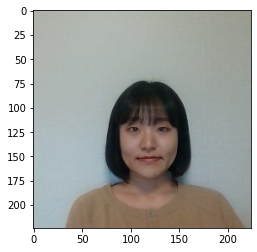

In [3]:
# matplotlib, dlib 등의 이미지 라이브러리 : 모두 RGB(빨강, 녹색, 파랑) 순 이미지 채널 사용
# opencv : BGR(파랑, 녹색, 빨강) 순 이미지 채널 사용
# plt.imshow 이전에 RGB 이미지로 바꾸기 (색깔 보정처리)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### Step 2. 얼굴 검출 & 랜드마크 검출 하기

In [4]:
# detector 선언하기
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(87, 108) (149, 170)]]


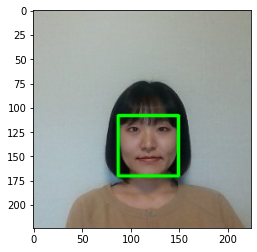

In [6]:
# 찾은 얼굴을 화면에 출력하기
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있다ㅋㅋ
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
# 잘라진 얼굴 이미지에서 68개의 이목구비 위치 찾기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [8]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark 찾아낸다.
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둔다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


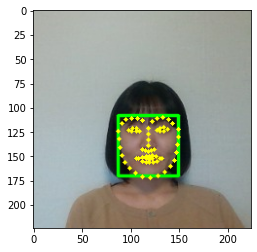

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### Step 3. 스티커 적용 위치 확인하기

In [10]:
# 코의 중심점 찾기 (이미지 시작점은 top-left 좌표)
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30
    x = landmark[30][0]  # x = 스티커의 x좌표
    y = landmark[30][1]  # y = 스티커의 y좌표
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h)) # 같으면 1:1의 비율의 크기로 스티커가 들어가?

(118, 139)
(x,y) : (118,139)
(w,h) : (63,63)


현재 얼굴 이미지에서 코의 중심점은 (118, 139)

In [11]:
# 준비해 둔 스티커 이미지를 읽어서 사이즈 적용 (resize)
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/catwhiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(63, 63, 3)


### Step 4. 스티커 적용하기

(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.

In [12]:
# 고양이 수염 이미지는 코 위치 그대로 사용
# 코 중심점을 기준으로 x, y좌표 조정하기 (이미지 시작점은 top-left 좌표)
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (87,108)


In [13]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


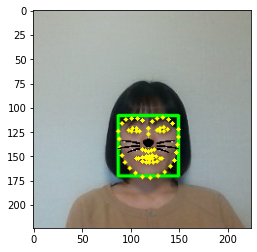

In [14]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### bounding box와 landmark를 제거하고 최종 결과만 출력

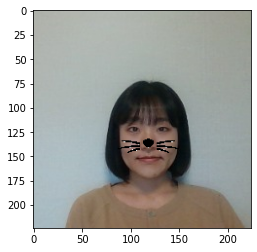

In [15]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 2. 얼굴 좀 더 크게

### Step1. 스티커 구하기 or 만들기

In [16]:
# 이미지 처리를 위해 opencv와 이미지를 출력하기 위한 matplotlib 읽어오기
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


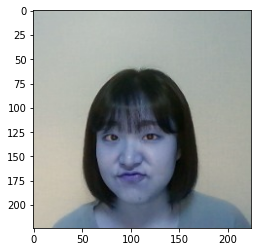

In [17]:
# 준비한 이미지를 읽기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/images_1.png' # images_1 : 좀 더 큰 얼굴
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지 불러오기
img_show = img_bgr.copy()      # 출력용 이미지 따로 보관
plt.imshow(img_bgr)
plt.show()

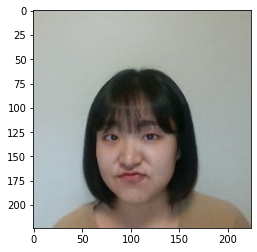

In [18]:
# matplotlib, dlib 등의 이미지 라이브러리 : 모두 RGB(빨강, 녹색, 파랑) 순 이미지 채널 사용
# opencv : BGR(파랑, 녹색, 빨강) 순 이미지 채널 사용
# plt.imshow 이전에 RGB 이미지로 바꾸기 (색깔 보정처리)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### Step 2. 얼굴 검출 & 랜드마크 검출 하기

In [19]:
# detector 선언하기
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [20]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(56, 106) (145, 196)]]


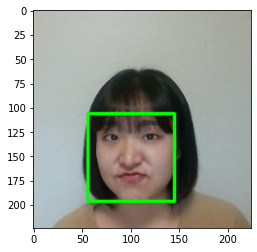

In [21]:
# 찾은 얼굴을 화면에 출력하기
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있다ㅋㅋ
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [22]:
# 잘라진 얼굴 이미지에서 68개의 이목구비 위치 찾기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [23]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark 찾아낸다.
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둔다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


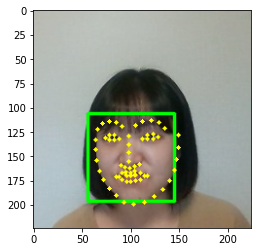

In [24]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### Step 3. 스티커 적용 위치 확인하기

In [25]:
# 코의 중심점 찾기 (이미지 시작점은 top-left 좌표)
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30
    x = landmark[30][0]  # x = 스티커의 x좌표
    y = landmark[30][1]  # y = 스티커의 y좌표
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(98, 155)
(x,y) : (98,155)
(w,h) : (90,90)


현재 얼굴 이미지에서 코의 중심점은 (98, 155)

In [26]:
# 준비해 둔 스티커 이미지를 읽어서 사이즈 적용 (resize)
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/catwhiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(90, 90, 3)


### Step 4. 스티커 적용하기

In [27]:
# 고양이 수염 이미지는 코 위치 그대로 사용
# 코 중심점을 기준으로 x, y좌표 조정하기 (이미지 시작점은 top-left 좌표)
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (53,110)


In [28]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


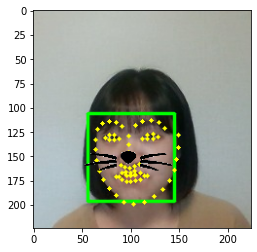

In [29]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

`img_show` 대신, 아껴 두었던 `img_rgb`를 활용

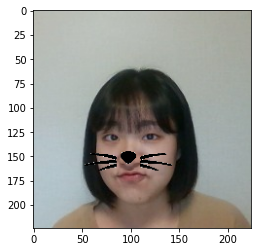

In [30]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

* 스티커 위치만 잘 잡아주면 얼굴 크기가 다른 것에는 크게 영향이 없다.

## 3. 얼굴 오른쪽

### Step1 ~ 2. 스티커 구하기 or 만들기, 얼굴 검출 & 랜드마크 검출 하기

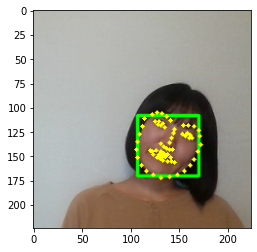

In [31]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/images_2.png' # images_2 : 얼굴 오른쪽
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지 불러오기
img_show = img_bgr.copy()      # 출력용 이미지 따로 보관

# matplotlib, dlib 등의 이미지 라이브러리 : 모두 RGB(빨강, 녹색, 파랑) 순 이미지 채널 사용
# opencv : BGR(파랑, 녹색, 빨강) 순 이미지 채널 사용
# plt.imshow 이전에 RGB 이미지로 바꾸기 (색깔 보정처리)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) 

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark 찾아낸다.
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둔다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### Step 3. 스티커 적용 위치 확인하기

In [32]:
# 코의 중심점 찾기 (이미지 시작점은 top-left 좌표)
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30
    x = landmark[30][0]  # x = 스티커의 x좌표
    y = landmark[30][1]  # y = 스티커의 y좌표
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h)) 

(140, 136)
(x,y) : (140,136)
(w,h) : (64,64)


* 현재 얼굴 이미지에서 코의 중심점은 (140, 136)

In [33]:
# 준비해 둔 스티커 이미지를 읽어서 사이즈 적용 (resize)
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/catwhiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(64, 64, 3)


In [34]:
import math
# 코 중심점과 코 시작점 사이의 각도를 이용해 이미지 회전
# 코 시작점 index는 27
dy = landmark[30][1] - landmark[27][1]
dx = landmark[30][0] - landmark[27][0]
angle = int(math.atan(dy/dx))
angle = angle * 180 / math.pi
sign = angle / abs(angle)

if angle > 0:
 nose_angle = 90 - angle
else:
 nose_angle = -90 - angle

* 왼쪽으로 기울어진 경우와 오른쪽으로 기울어진 경우 분리

### Step 4. 스티커 적용하기

In [35]:
# 고양이 수염 이미지는 코 위치 그대로 사용
# 코 중심점을 기준으로 x, y좌표 조정하기 (이미지 시작점은 top-left 좌표)
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (108,104)


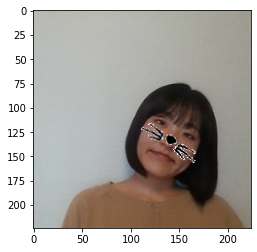

In [36]:
rows, cols = img_sticker.shape[:2]
M= cv2.getRotationMatrix2D((cols//2, rows//2), nose_angle, 1)
dst = cv2.warpAffine(img_sticker, M,(cols, rows), borderValue=(255,255,255))

sticker_area = img_bgr[refined_y:refined_y+cols, refined_x:refined_x+ rows]

img_bgr[refined_y:refined_y+cols, refined_x:refined_x+ rows] = \
    np.where(dst==255,sticker_area,dst).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

* 얼굴이 기울어진 각도만큼 스티커가 잘 기울어져 붙어있다.

## 3. 얼굴 왼쪽

### Step1 ~ 2. 스티커 구하기 or 만들기, 얼굴 검출 & 랜드마크 검출 하기

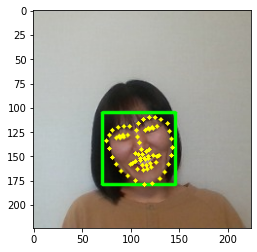

In [37]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/images_3.png' # images_3 : 얼굴 왼쪽
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지 불러오기
img_show = img_bgr.copy()      # 출력용 이미지 따로 보관

# matplotlib, dlib 등의 이미지 라이브러리 : 모두 RGB(빨강, 녹색, 파랑) 순 이미지 채널 사용
# opencv : BGR(파랑, 녹색, 빨강) 순 이미지 채널 사용
# plt.imshow 이전에 RGB 이미지로 바꾸기 (색깔 보정처리)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) 

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark 찾아낸다.
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둔다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### Step 3. 스티커 적용 위치 확인하기

In [38]:
# 코의 중심점 찾기 (이미지 시작점은 top-left 좌표)
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30
    x = landmark[30][0]  # x = 스티커의 x좌표
    y = landmark[30][1]  # y = 스티커의 y좌표
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h)) 

(111, 143)
(x,y) : (111,143)
(w,h) : (76,76)


* 현재 얼굴 이미지에서 코의 중심점은 (111, 143)

In [39]:
# 준비해 둔 스티커 이미지를 읽어서 사이즈 적용 (resize)
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/catwhiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(76, 76, 3)


In [40]:
import math
# 코 중심점과 오른쪽 눈썹 시작점 사이의 각도를 이용해 이미지 회전
# 코 시작점 index는 27
dy = landmark[30][1] - landmark[22][1]
dx = landmark[30][0] - landmark[22][0]
angle = int(math.atan(dy/dx))
angle = angle * 180 / math.pi
sign = angle / abs(angle)

if angle > 0:
 nose_angle = 90 - angle
else:
 nose_angle = -90 - angle

### Step 4. 스티커 적용하기

In [41]:
# 고양이 수염 이미지는 코 위치 그대로 사용
# 코 중심점을 기준으로 x, y좌표 조정하기 (이미지 시작점은 top-left 좌표)
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (73,105)


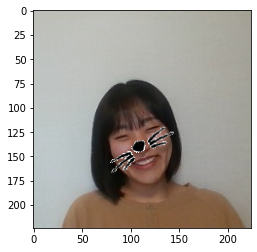

In [42]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식
rows, cols = img_sticker.shape[:2]
M= cv2.getRotationMatrix2D((cols//2, rows//2), nose_angle, 1)
dst = cv2.warpAffine(img_sticker, M,(cols, rows), borderValue=(255,255,255))

sticker_area = img_bgr[refined_y:refined_y+cols, refined_x:refined_x+rows]

img_bgr[refined_y:refined_y+cols, refined_x:refined_x+ rows] = \
    np.where(dst==255,sticker_area,dst).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 4. addWeighted() 함수 활용하기

### (1) 얼굴 이미지에 희미한(?) 왕관을 씌워보자 

In [43]:
# 이미지 처리를 위해 opencv와 이미지를 출력하기 위한 matplotlib 읽어오기
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

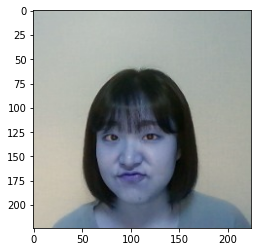

In [44]:
# 준비한 이미지를 읽기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/images_1.png' # images_1 : 좀 더 큰 얼굴
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지 불러오기
img_show = img_bgr.copy()      # 출력용 이미지 따로 보관
plt.imshow(img_bgr)
plt.show()

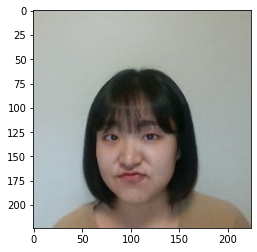

In [45]:
# matplotlib, dlib 등의 이미지 라이브러리 : 모두 RGB(빨강, 녹색, 파랑) 순 이미지 채널 사용
# opencv : BGR(파랑, 녹색, 빨강) 순 이미지 채널 사용
# plt.imshow 이전에 RGB 이미지로 바꾸기 (색깔 보정처리)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [46]:
# detector 선언하기
detector_hog = dlib.get_frontal_face_detector()

In [47]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(56, 106) (145, 196)]]


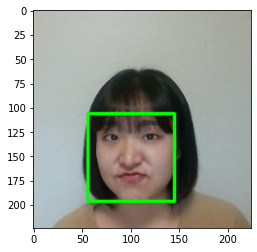

In [48]:
# 찾은 얼굴을 화면에 출력하기
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있다ㅋㅋ
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [49]:
# 잘라진 얼굴 이미지에서 68개의 이목구비 위치 찾기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [50]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark 찾아낸다.
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둔다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


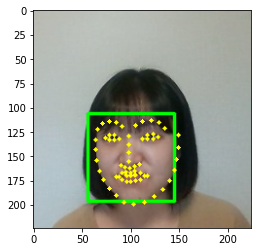

In [51]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [52]:
# 코의 중심점 찾기 (이미지 시작점은 top-left 좌표)
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30
    x = landmark[30][0]  # x = 스티커의 x좌표
    y = landmark[30][1] - dlib_rect.height()//2 # y = 스티커의 y좌표
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(98, 155)
(x,y) : (98,110)
(w,h) : (90,90)


In [53]:
# 준비해 둔 스티커 이미지를 읽어서 사이즈 적용 (resize)
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(90, 90, 3)


In [54]:
# 고양이 수염 이미지는 코 위치 그대로 사용
# 코 중심점을 기준으로 x, y좌표 조정하기 (이미지 시작점은 top-left 좌표)
refined_x = x + 10 - w // 2
refined_y = y -h-20
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (63,0)


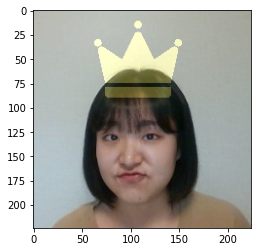

In [55]:
# 워터마크로 넣을 이미지를 그레이스케일 색상공간으로 변환
img_sticker_gray = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2GRAY)

# 그레이스케일 이미지를 임계값으로 이진화하여 마스크 생성
ret, mask = cv2.threshold(img_sticker_gray, 250, 255, cv2.THRESH_BINARY)

# 해당 마스크의 역처리(not 비트연산)
mask_inv = cv2.bitwise_not(mask)

# 워터마크 이미지에서 워터마크 영역만 추출(and 비트연산, 역마스크 영역)
img_sticker_fg = cv2.bitwise_and(img_sticker, img_sticker, mask = mask_inv)

# 배경 이미지의 ROI구하기
roi = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 배경 이미지의 ROI 영역과 워터마크 이미지의 워터마크 영역을 블렌딩
dst = cv2.addWeighted(roi, 1, img_sticker_fg, 0.3, 0)

# 배경 이미지의 ROI 영역을 위의 dst 이미지로 변경
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = dst

# 블렌딩 이미지 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

* 변화를 준 가중치만큼 왕관이 희미하게 출력되는 것을 볼 수 있다.

### (2) addWeighted() 함수와 트렉바를 활용해 이미지 변환을 시켜보자

In [ ]:
# 준비한 이미지를 읽기
men_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/men.png'
iron_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/iron.png'
img1 = cv2.imread(men_path)   
img1 = cv2.imread(iron_path) 

In [ ]:
global img1, img2

# 가중치에 변화를 주는 함수
def on_change_weight(x):
    weight = x / 100
    img_merged = cv2.addWeighted(img1, 1 - weight, img2, weight, 0)
    cv2.imshow('Display', img_merged)


cv2.namedWindow('Display')
# 트랙바를 만들어 준다
cv2.createTrackbar('weight', 'Display', 0, 100, on_change_weight)

# 이미지 사이즈를 같게 해줘야 한다
img1 = cv2.resize(img1, (323, 349))
img2 = cv2.resize(img2, (323, 349))

cv2.imshow('Display', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

* cv2.createTrackbar() 함수와 addWeighted()함수를 같이 사용하게 되면 가중치 변화를 줄 수 있는 트랙바가 윈도우 창에 뜬다.
* 트랙바를 이리저리 움직여주면 가중치 변화를 실시간으로 확인이 가능하다.
* 해당 기능을 사용해 로다주 얼굴이 아이언맨으로 바뀌는 것을 확인하고 싶었으나 cloud 환경이라 코드 실행이 되지 않아 확인하지 못했다. (실행 할 때마다, 커널이 자꾸 꺼진다.)
* cloud 환경에서도 구현이 가능하게 코드를 짤 수는 없는가?

## 5. 여러 명의 얼굴, 여러 각도

* 위의 과정을 하나의 함수로 만든다.
* 파일 이름을 넣으면 고양이 수염이 붙어서 결과가 출력되게 한다.

In [56]:
# 필요한 모듈 불러오기
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
import math

In [57]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/catwhiskers.png'

In [58]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/'

def add_cat_whisker(file_name):
    # dir_to_write에 이미지 파일을 생성합니다. 
    img_path = os.path.join(my_image_path, file_name)
    img_bgr = cv2.imread(img_path)  # BGR 기반
    img_show = img_bgr.copy()  # 이 함수는 im_show를 수정한다.
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    detector_hog = dlib.get_frontal_face_detector()
    dlib_rects = detector_hog(img_rgb, 2)
    
    # landmark 표시
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
    # list_landmarks[0]은 첫번째 사람의 특징점의 리스트
    

    # 여러 명인 경우(bbox가 여러개)
    for i, _ in enumerate(list_landmarks):
        landmarks = list_landmarks[i]  # (i+1)번째 사람의 특징점 리스트

        # 코 인덱스 부분을 중심점으로 스티커 붙이기
        # 각도 고려
        dy = landmarks[30][1] - landmarks[27][1]
        dx = landmarks[30][0] - landmarks[27][0]
        try:
            angle = math.atan(dy/dx)
        except ZeroDivisionError:  # dx == 0 인 경우 각도를 직접 지정합니다
            angle = (math.pi/2 - 1e-5)
        angle = angle * 180 / math.pi
        sign = angle / abs(angle)

        if angle > 0:  # 오른쪽으로 기울어진 경우와 왼쪽으로 기울어진 경우를 나눠준다.
            nose_angle = 90 - angle
        else:
            nose_angle = -90 - angle
        
        # 스티커 크기 및 중심점
        perp_mouse_vector = [landmarks[54][0] - landmarks[48][0], landmarks[54][1] - landmarks[48][1]] # 입술 양 끝을 잇는다
        length = int(np.linalg.norm(perp_mouse_vector)) # 슬라이싱에 사용되므로 좌표의 경우 int형으로 변환해 줍니다
        sticker_size = (length, length)
        
        nose_x, nose_y = landmarks[30] # 중심점
        refined_x, refined_y = int(nose_x + sign), int(nose_y + sign)
        
        img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러온다.
        img_sticker = cv2.resize(img_sticker, sticker_size)
        
        rows, cols = img_sticker.shape[:2]
        pin_sticker_start = (nose_x - rows // 2, nose_y - cols //2)
        M = cv2.getRotationMatrix2D((cols//2, rows//2), angle, 1)
        dst = cv2.warpAffine(img_sticker, M,(cols, rows), borderValue=(255,255,255))

        sticker_area = \
        img_show[pin_sticker_start[1] : pin_sticker_start[1] + cols, pin_sticker_start[0] : pin_sticker_start[0] + rows] 
        # img_show에서 원본으로 사용할 부분을 변수로 저장

        img_show[pin_sticker_start[1] : pin_sticker_start[1] + cols, pin_sticker_start[0] : pin_sticker_start[0] + rows] = \
        np.where(dst==255, sticker_area, dst).astype(np.uint8) 

    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()

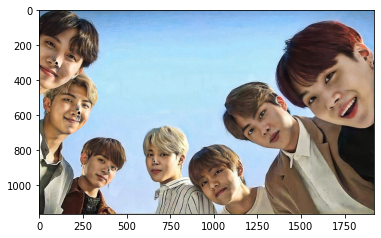

In [59]:
add_cat_whisker('BTS.png')

* 7명 중 4명은 스티커가 붙어있고 나머지 3명은 스티커가 붙어있지 않다. (얼굴인식이 제대로 이루어지지 못 함.)
* 스티커가 입 양 끝단을 기준으로 크기 조정이 되게끔 했으나 제대로 이루어지지 못 함.
* 스티커의 방향이 제멋대로 되어있다. (방향 조정 또한 제대로 이루어지지 못 함.)
* 따라서, 전체적인 함수 수정이 필요해 보인다.
* 함수를 단계별로 쪼개 출력되는 결과물을 확인해 볼 필요가 있다.
* 미안해, 방탄..나도 이렇게 나올 줄 몰랐어

## 6. 동영상에 스티커붙이기

### (1) 건후 얼굴에 볼터치 스티커를 붙여보자 (귀여운거 + 귀여운거 = 왕귀여운거)

In [60]:
# VideoFileClip 은 비디오 파일을 읽어올 때 사용되는 클래스 
from moviepy.editor import VideoFileClip
# ipython_display() 는 동영상을 주피터 노트북에 렌더링할 수 있게 도와주는 함수
from moviepy.editor import ipython_display
import cv2
import dlib
import os

In [61]:
# 클라우드 주피터 상에서 동영상 출력하기
# 저장되어있는 영상파일(mp4) 불러오기
video_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/baby.mp4'
clip = VideoFileClip(video_path)
clip = clip.resize(width=640)
clip.ipython_display(fps=30, loop=True, autoplay=True, rd_kwargs=dict(logger=None))

In [62]:
vc = cv2.VideoCapture(video_path)
# cv2의 get() 함수로 읽을 수 있습니다. FRAME_COUNT 은 비디오 전체 프레임 개수
vlen = int(vc.get(cv2.CAP_PROP_FRAME_COUNT))
print (vlen) # video length

for i in range(vlen):
    # ret 은 read() 함수에서 이미지가 반환되면 True, 반대의 경우 False
    ret, img = vc.read()
    if ret == False:
        break

29


In [63]:
def img2sticker_orig(img_orig, img_sticker, detector_hog, landmark_predictor):
    # 전처리 과정
    # RGB 이미지로 바꾸기 (색깔 보정처리)
    img_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)

    # detector, 얼굴 영역 부분 인식
    detector_hog = dlib.get_frontal_face_detector()
    dlib_rects = detector_hog(img_rgb, 1)
    if len(dlib_rects) < 1:
        return img_orig

    # landmark
    # 얼굴 영역 박스 마다 face landmark 찾아낸다.
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        # face landmark 좌표를 저장해둔다
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    # 입술 중심점 찾기, 입술 중심의 index는 66
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x = landmark[66][0]   # x = 스티커의 x좌표
        y = landmark[66][1]   # y = 스티커의 y좌표
        w = dlib_rect.width()
        h = dlib_rect.width() // 3
        break   
        
    # 준비해 둔 스티커 이미지를 읽어서 사이즈 적용 (resize)
    sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cute.png'
    img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
    img_sticker = cv2.resize(img_sticker, (w,h))
    
    # 코 중심점을 기준으로 x, y좌표 조정하기 (이미지 시작점은 top-left 좌표)
    refined_x = x - w // 2
    refined_y = y - h

    # 위치 조정 후 좌표가 음수가 나오는 경우 슬라이싱 후 좌표값 0으로 변환
    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:]
        refined_y = 0

    img_bgr = img_orig.copy()
    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    # 영상에 스티커 붙이기
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        cv2.addWeighted(sticker_area, 1.0, img_sticker, 0.7, 0)

    return img_bgr

In [64]:
# 영상으로 저장하기
detector_hog = dlib.get_frontal_face_detector()
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

vc = cv2.VideoCapture(video_path)

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/catwhiskers.png'
img_sticker = cv2.imread(sticker_path)

vlen = int(vc.get(cv2.CAP_PROP_FRAME_COUNT))
print (vlen) # 비디오 프레임의 총 개수

# writer 초기화
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
save_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/result.mp4'
vw = cv2.VideoWriter(save_path, fourcc, 10, (1280, 720))

for i in range(vlen):
    ret, img = vc.read()
    if ret == False:
        break
    # 연산에 걸리는 시간을 측정
    start = cv2.getTickCount()
    img_result = img2sticker_orig(img, img_sticker.copy(), detector_hog, landmark_predictor)
    time = (cv2.getTickCount() - start) / cv2.getTickFrequency() * 1000
    print ('[INFO] time: %.2fms'%time)

        # 매 프레임 마다 저장한다.    
    vw.write(cv2.resize(img_result, (1280,720)))

vw.release()

29
[INFO] time: 496.56ms
[INFO] time: 442.73ms
[INFO] time: 444.10ms
[INFO] time: 465.98ms
[INFO] time: 448.23ms
[INFO] time: 496.05ms
[INFO] time: 490.51ms
[INFO] time: 475.12ms
[INFO] time: 470.13ms
[INFO] time: 488.03ms
[INFO] time: 485.86ms
[INFO] time: 445.93ms
[INFO] time: 471.24ms
[INFO] time: 470.48ms
[INFO] time: 447.94ms
[INFO] time: 495.85ms
[INFO] time: 471.31ms
[INFO] time: 507.07ms
[INFO] time: 457.29ms
[INFO] time: 481.59ms
[INFO] time: 518.26ms
[INFO] time: 475.12ms
[INFO] time: 519.18ms
[INFO] time: 458.53ms
[INFO] time: 469.70ms
[INFO] time: 438.05ms
[INFO] time: 493.47ms
[INFO] time: 485.10ms
[INFO] time: 505.65ms


In [65]:
# 클라우드 주피터 상에서 결과 동영상 출력하기
# 저장한 결과 영상파일(mp4) 불러오기
video_path2 = os.getenv('HOME')+'/aiffel/camera_sticker/images/result.mp4' # 결과 영상
clip = VideoFileClip(video_path2)
clip = clip.resize(width=640)
clip.ipython_display(fps=30, loop=True, autoplay=True, rd_kwargs=dict(logger=None))

* 건후 얼굴에 스티커가 붙어서 영상이 저장된 것을 확인 할 수 있다.
* cv2.getTickCount()함수와 cv2.getTickFrequency()함수를 사용하면 연산시간 측정이 가능하나, OpenCV 3.2.0 버전부터 연산 시간 측정을 위한 TickMeter라는 이름의 클래스를 새롭게 제공한다.
* 파이썬에서는 time 모듈도 사용이 가능하다. 
* 연산시간은 주로 성능을 측정하기 위해 많이 사용하며, 성능의 개선 및 최적화 정도를 측정하기 위한 도구로도 활용된다. 

## 7. 회고

### (1) 이번 프로젝트에서 어려웠던 점

* addWeighted() 함수 적용 시 본적도 없는 함수들과 연산을 써야해서 하나하나 찾아가면서 적용시켰다.\
  (addWeighted() 뿐만 아니라 동영상에 스티커를 적용하는 것도 너무 힘들었다.)

### (2) 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

* 파이썬에는 유용한 모듈과 메서드들이 정말 많다는 것을 새삼 느꼈다. 그래서 뭔가 구현하고자 할 때 모듈이나 메서드를 먼저 찾아보는 것도 하나의 방법이 될 수 있겠다 생각했다.
* 영상에 스티커를 붙이는 작업을 진행해 보았는데, 영상 처리와 관련해서는 대부분 성능에 대한 평가와 개선이 같이 진행되고 있는다는 것 같았다.
* 이번에는 영상 자체의 길이가 짧아서 성능 평가와 개선 부분은 확인하지 않았는데, 이 부분에 대해 더 알아볼 필요가 있어 보인다.
* 주피터 노트북에서 동영상을 출력하는 코드 중 아래와 같이 HTML을 사용한 코드 구현도 있었는데, 영상이 출력되지 않았다. 영상이 출력되지 않은 이유에 대해 고민해 봐야 겠다.

In [ ]:
def show_video_in_jupyter_nb(width, height, video_url):
    from IPython.display import HTML
    return HTML("""<video width="{}" height="{}" controls>
    <source src={} type="video/mp4">
    </video>""".format(width, height, video_url))
video_url = '../../assets/images/markdown_img/180628_test_video.mp4'
show_video_in_jupyter_nb(200, 300,video_url)

### (3) 실패한 이유에 관한 추정

* 트랙바 사용하기
  * 트랙바 부분은 window창이 새로 뜨면서 트랙바가 생성이 되는 코드이다.
  * 클라우드 주피터에서는 해당 부분의 코드가 실행될 때 커널이 계속해서 죽는 현상이 발생한다.
* 여러 명의 얼굴에 스티커가 제대로 붙지 않았다.
  * 7명 중 4명의 얼굴에 스티커가 붙어서 출력이 되는 것을 보면 얼굴 인식이 완전히 안되는 것은 아닌 것 같다.
  * 함수로 완전히 하나로 통합해서 출력을 하다보니 어디 부분에서부터 잘 진행이 안되는 것인지 파악이 안 된다.
  * 함수를 조금씩 쪼개서 문제가 발생하는 부분을 찾아봐야 할 것 같다.
  * 크게는 얼굴인식, 스티커 resize, 스티커 각도 부분에서 문제가 있어 보인다.

### (4) 자기다짐

* 클라우드 주피터에서 트랙바를 생성 할 수 있는 코드가 있을 것 같은데, 더 찾아봐야 할 것 같다.
* 함수로 구현되는 부분은 다시 코드로 짜볼 필요가 있다.
* 영상과 관련된 부분은 사전 지식없이 진행한 부분이라  얻어 걸린 느낌이 없지않아 있다. 
* 영상관련 부분도 공부를 좀 더 한 뒤에 해보면 더 재밌는 코드들도 구현이 가능할 것 같다.
* 이미지 밝기에 관한 변수도 고려해서 스티커 붙여보면 재밌을 것 같다.

### (5) 글쓰기 정리 필요한 내용

* addWeighted() 함수 적용 전 이미지 전처리 시 비트 연산 
* 이미지 회전 시 사용한 math모듈, math.atan() 함수

## 8.참고 자료

* addWeight() 함수 및 트렉바 \
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=pk3152&logNo=221442931136 \ 
https://pintelligence.tistory.com/23

* 고양이 수염 회전시켜 붙이기 \
https://velog.io/@gibonki77/Ex3-%EA%B3%A0%EC%96%91%EC%9D%B4-%EC%88%98%EC%97%BC-%EB%8B%AC%EA%B8%B0%ED%9A%8C%EC%A0%84%EC%97%90-%EA%B0%95%EA%B1%B4%ED%95%98%EA%B2%8C1


* 동영상에 스티커 붙이기 \
https://hazel-developer.tistory.com/103 \
https://thebook.io/006939/ch04/05/02-01/ \
https://meissa.tistory.com/83 \
https://frhyme.github.io/others/jupyter%EC%97%90%EC%84%9C-%EB%B9%84%EB%94%94%EC%98%A4-%ED%91%9C%ED%98%84%ED%95%98%EA%B8%B0/